In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("UsArrests.csv",index_col='City')
df.head()


,Murder,Assault,UrbanPop,Rape
City,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [2]:
pd.options.display.float_format = '{:,.2f}'.format

#The describe function give us insight into the statistical properties of the columns
stats = df.describe()
selected_stats = stats.loc[["mean","std","min","max"]].transpose() #select relevant rows
selected_stats



,mean,std,min,max
Murder,7.79,4.36,0.80,17.40
Assault,170.76,83.34,45.00,337.00
UrbanPop,65.54,14.47,32.00,91.00
Rape,21.23,9.37,7.30,46.00


In [3]:
# Count missing values
missing = df.isnull().sum()
relevant_missing = pd.DataFrame(missing, columns=["missing"])
relevant_missing = relevant_missing[relevant_missing["missing"]>0]
relevant_missing.sum()



missing   0.00
dtype: float64

In [4]:
# Examine types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


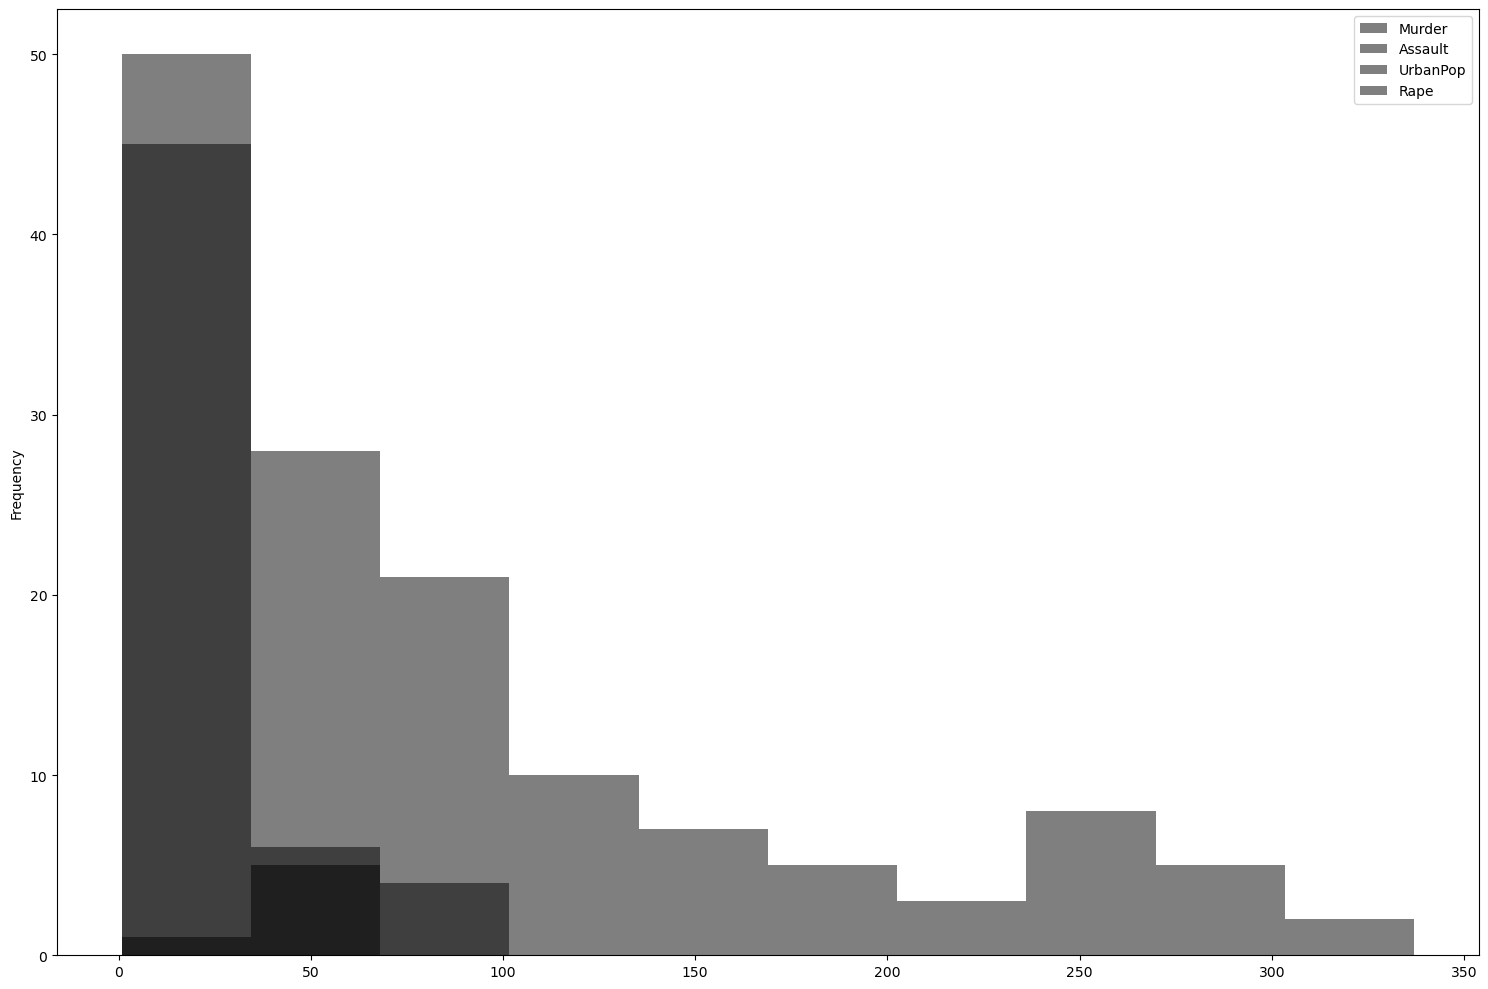

In [5]:
# Plot histograms

df.plot(kind='hist', color='black', grid=False, figsize=(15, 10), alpha=0.5)
plt.tight_layout()
plt.show()

In [6]:
# Create summary table

summary = pd.concat([relevant_missing,selected_stats], axis=1)
summary.rename(columns = {0:"missing"}, inplace = True)
summary.to_csv('summary.csv', index=True)
summary

,missing,mean,std,min,max
Murder,NaN,7.79,4.36,0.80,17.40
Assault,NaN,170.76,83.34,45.00,337.00
UrbanPop,NaN,65.54,14.47,32.00,91.00
Rape,NaN,21.23,9.37,7.30,46.00


In [7]:
from sklearn.impute import KNNImputer 

In [9]:
# reshape because we are looking at a single feature

X = df["Murder"].values.reshape(-1,1)
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
imputer.fit(X)
X_imputed = imputer.transform(X)

comparison = pd.DataFrame(columns=["Assault","Rape"])
comparison["Assault"] = df["Murder"]
comparison["Rape"] = X_imputed
print(comparison)

                Assault  Rape
City                         
Alabama           13.20 13.20
Alaska            10.00 10.00
Arizona            8.10  8.10
Arkansas           8.80  8.80
California         9.00  9.00
Colorado           7.90  7.90
Connecticut        3.30  3.30
Delaware           5.90  5.90
Florida           15.40 15.40
Georgia           17.40 17.40
Hawaii             5.30  5.30
Idaho              2.60  2.60
Illinois          10.40 10.40
Indiana            7.20  7.20
Iowa               2.20  2.20
Kansas             6.00  6.00
Kentucky           9.70  9.70
Louisiana         15.40 15.40
Maine              2.10  2.10
Maryland          11.30 11.30
Massachusetts      4.40  4.40
Michigan          12.10 12.10
Minnesota          2.70  2.70
Mississippi       16.10 16.10
Missouri           9.00  9.00
Montana            6.00  6.00
Nebraska           4.30  4.30
Nevada            12.20 12.20
New Hampshire      2.10  2.10
New Jersey         7.40  7.40
New Mexico        11.40 11.40
New York  

In [10]:
df["Murder"] = X_imputed #replace in dataframe

# Count missing values to check that there aren't any
missing = df["Murder"].isnull().sum()
print("Missing values after imputation:", missing)

Missing values after imputation: 0


In [11]:
countries = df.index
corr_df = df.drop(["UrbanPop"],axis=1).corr()
labels =corr_df.columns

correlations = corr_df.corr()

In [12]:
import seaborn as sns

C:\Users\Gaetano\AppData\Local\Temp\ipykernel_6168\3241675637.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr_df, cmap="coolwarm", annot=True, fmt='.2f', mask=np.triu(np.ones(corr_df.shape)).astype(np.bool))


<AxesSubplot:>

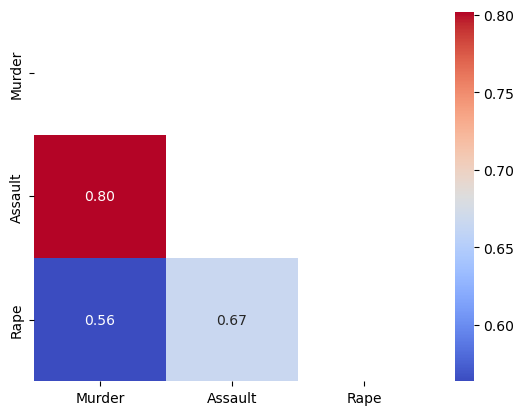

In [13]:
sns.heatmap(corr_df, cmap="coolwarm", annot=True, fmt='.2f', mask=np.triu(np.ones(corr_df.shape)).astype(np.bool))

In [14]:
from sklearn.decomposition import PCA

In [15]:
#run again if it does not converge the first time

In [16]:
np.set_printoptions(precision=2)

X = df.drop(["UrbanPop"],axis=1)

pca = PCA()

X_trans = pca.fit_transform(X)

df_pca = pd.DataFrame(data=X_trans, columns=['PCA%i' % i for i in range(X_trans.shape[1])], index=X.index)
df_pca.head()

,PCA0,PCA1,PCA2
City,,,
Alabama,65.22,-4.86,2.81
Alaska,93.74,16.23,-2.12
Arizona,123.53,0.36,-4.87
Arkansas,19.08,-3.17,0.30
California,106.35,11.32,-3.53


In [17]:
std = df_pca.std()
print(f"Standard deviation of PCA: {std.values}")

Standard deviation of PCA: [83.64  6.98  2.59]


In [18]:
print(f"Proportion of Variance Explained: {pca.explained_variance_ratio_}")

Proportion of Variance Explained: [9.92e-01 6.90e-03 9.54e-04]


In [19]:
print(f"Cumulative Proportion: {np.cumsum(pca.explained_variance_)}")

Cumulative Proportion: [6996.48 7045.14 7051.87]


In [20]:
# Defining a function called "biplot" which is used to create a scatter plot of the data

In [21]:
def biplot(score,coeff,labels=None,points=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    fig, ax = plt.subplots()    

    ax.scatter(xs * scalex,ys * scaley,s=5)

    for i in range(0,len(xs)):
        txt = countries[i]
        ax.annotate(txt, (xs[i]* scalex, ys[i]* scaley))

    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

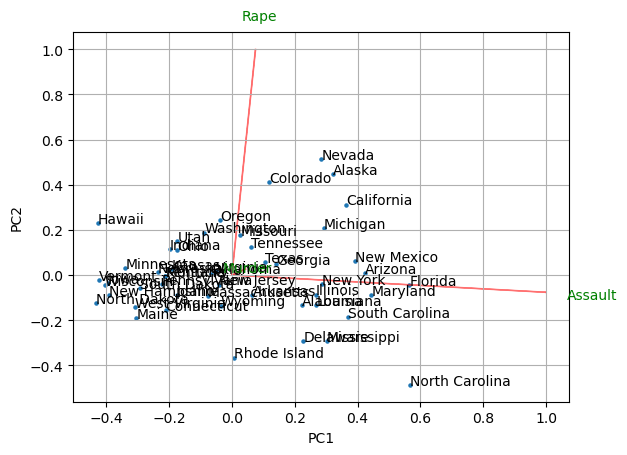

In [22]:
biplot(X_trans[:,0:2],np.transpose(pca.components_[0:2, :]),list(labels),list(countries))
plt.show()

In [23]:
# Features of importance

In [24]:
pd.options.display.float_format = '{:.3f}'.format #change precision to see more decimal places

pc1 = abs( pca.components_[0] ) #components x features - access at index 0 to get the first component
pc2 = abs( pca.components_[1] )

feat_df = pd.DataFrame({"Features": list(labels),
"PC1 Importance": pc1,
"PC2 Importance": pc2
})
feat_df

,Features,PC1 Importance,PC2 Importance
0,Murder,0.042,0.026
1,Assault,0.996,0.076
2,Rape,0.075,0.997


In [25]:
from sklearn.preprocessing import StandardScaler

In [33]:
X_std = StandardScaler().fit_transform(X)
pca = PCA()
X_std_trans = pca.fit_transform(X_std)
df_std_pca = pd.DataFrame(data=X_std_trans, columns=['PCA%i' % i for i in range(X_std_trans.shape[1])], index=X.index)
df_std_pca.head()

,PCA0,PCA1,PCA2
City,,,
Alabama,1.210,0.842,0.164
Alaska,2.332,-1.539,-0.039
Arizona,1.519,-0.503,-0.887
Arkansas,0.178,0.328,-0.072
California,2.066,-1.285,-0.385


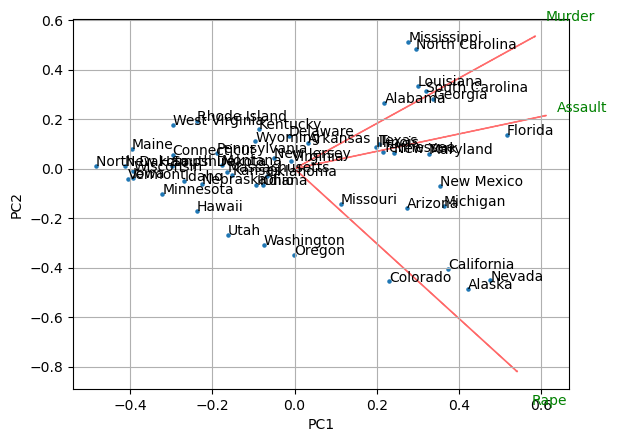

In [34]:
biplot(X_std_trans[:,0:2],np.transpose(pca.components_[0:2, :]),list(labels))
plt.show()

In [ ]:
# Features of importance

In [36]:
pc1 = abs( pca.components_[0] ) #components x features - access at index 0 to get the first component
pc2 = abs( pca.components_[1] )
feat_df = pd.DataFrame({"Features": labels, "PC1 Importance": pc1, "PC2 Importance": pc2})
feat_df

,Features,PC1 Importance,PC2 Importance
0,Murder,0.583,0.534
1,Assault,0.608,0.214
2,Rape,0.539,0.818


In [40]:
# Cumulative variance plot

Text(0.5, 1.0, 'Cumulative Explained Variance')

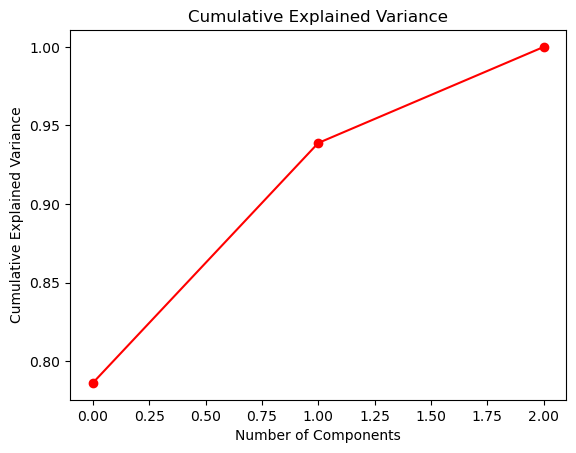

In [41]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), '-o', c='red')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title("Cumulative Explained Variance")

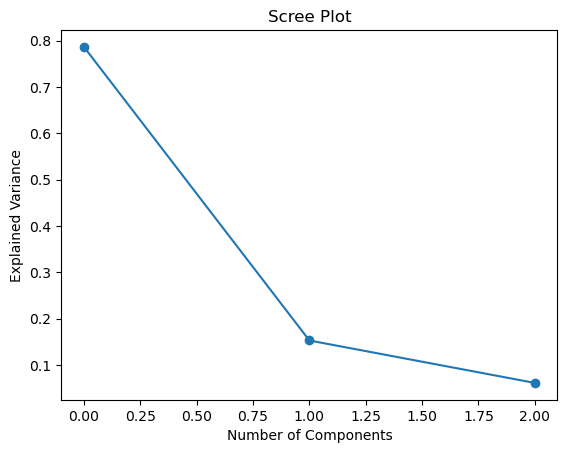

In [43]:
# Scree plot
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title("Scree Plot")
plt.show()

In [48]:
pca_df = pd.DataFrame(X_std_trans[:,0:5], index = df.index)
pca_df.head()

,0,1,2
City,,,
Alabama,1.210,0.842,0.164
Alaska,2.332,-1.539,-0.039
Arizona,1.519,-0.503,-0.887
Arkansas,0.178,0.328,-0.072
California,2.066,-1.285,-0.385


In [49]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

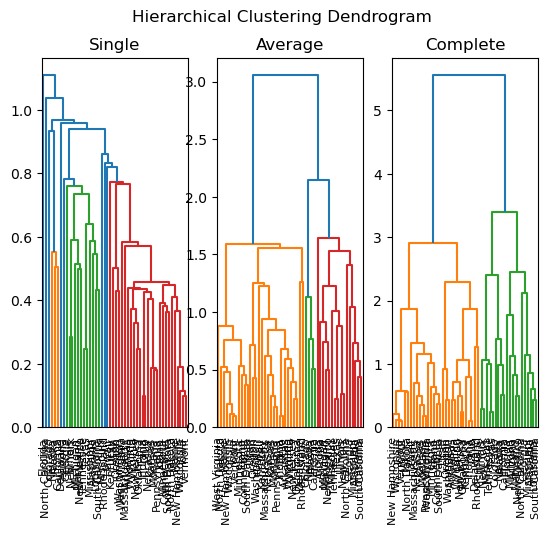

In [51]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Hierarchical Clustering Dendrogram')
ax1.set_title("Single")
dendrogram(linkage(pca_df, method='single'), labels=pca_df.index, ax=ax1)
ax2.set_title("Average")
dendrogram(linkage(pca_df, method='average'), labels=pca_df.index, ax=ax2)
ax3.set_title("Complete")
dendrogram(linkage(pca_df, method='complete'), labels=pca_df.index, ax=ax3)
plt.show()

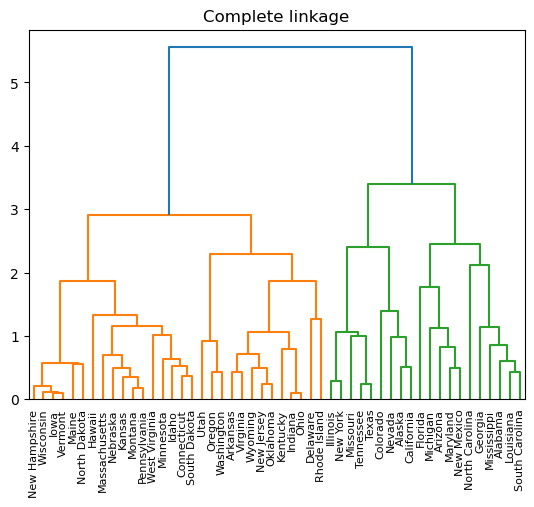

In [61]:
plt.title("Complete linkage")
dendrogram(linkage(pca_df, method='complete'), labels=pca_df.index)
plt.show()

In [62]:
from sklearn.cluster import KMeans

In [63]:
# We extract the first two components

In [64]:
x = X_std_trans[:,0]
y = X_std_trans[:,1]

In [65]:
# Fit k-means

In [66]:
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(pca_df)
centroids = kmeans.cluster_centers_

In [67]:
# Plot clusters

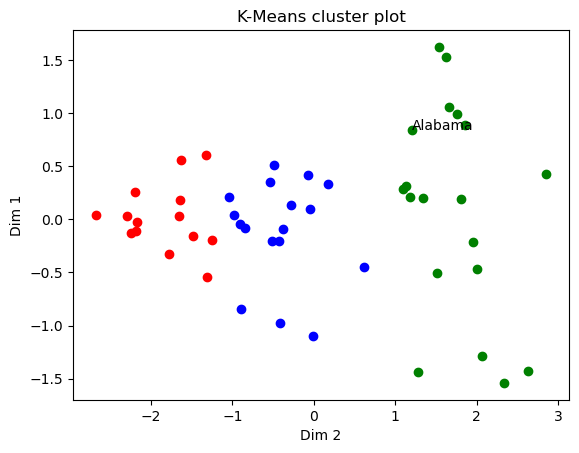

In [70]:
fig, ax = plt.subplots()
colours = 'rbgy'
for i in range(k):
    ax.scatter(pca_df.iloc[cluster_labels == i, 0], pca_df.iloc[cluster_labels == i, 1],c = colours[i])

for i in range(len(pca_df)):
    txt = pca_df.index[i]
    ax.annotate(txt, (pca_df.iloc[i, 0], pca_df.iloc[i, 1]))
    ax.set_title("K-Means cluster plot")
    ax.set_xlabel("Dim 2")
    ax.set_ylabel("Dim 1")
    plt.show()